In [2]:
import numpy as np

CHROMOSOME_SIZE = 20

class Individual():

    def __init__(self):
        self.chromosome = []
        self.fitness = 0
        self.fitness_by_rank = 0
        self.rastrigins = 0
        self.chance = 0

        for x in range(CHROMOSOME_SIZE):
            self.chromosome.append(np.random.randint(0,2))
        
         


------------- GENERATION 0 ---------------
------------- GENERATION 1 ---------------
------------- GENERATION 2 ---------------
------------- GENERATION 3 ---------------
------------- GENERATION 4 ---------------
------------- GENERATION 5 ---------------
------------- GENERATION 6 ---------------
------------- GENERATION 7 ---------------
------------- GENERATION 8 ---------------
------------- GENERATION 9 ---------------
------------- GENERATION 10 ---------------
------------- GENERATION 11 ---------------
------------- GENERATION 12 ---------------
------------- GENERATION 13 ---------------
------------- GENERATION 14 ---------------
------------- GENERATION 15 ---------------
------------- GENERATION 16 ---------------
------------- GENERATION 17 ---------------
------------- GENERATION 18 ---------------
------------- GENERATION 19 ---------------
------------- GENERATION 20 ---------------
------------- GENERATION 21 ---------------
------------- GENERATION 22 --------------

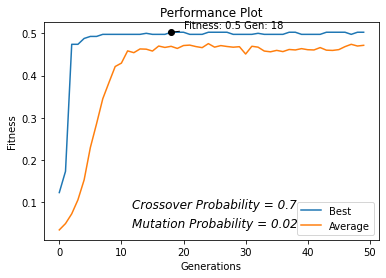

In [3]:
# import individual as indv
import numpy as np
import math
import matplotlib.pyplot as plt

SIZE_OF_POPULATION = 200
NUMBER_OF_ITERATIONS = 50
CHANCE_OF_MUTATION = 0.02
CHANCE_OF_CROSSOVER = 0.7


def truncate(number, digits) -> float:
    stepper = pow(10.0, digits)
    return math.trunc(stepper * number) / stepper

def rastrigins(x, y):
    result = 20 + np.power(x, 2) + np.power(y, 2) - 10 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))
    return truncate(result,2)

def get_chromosome_value(individual):
    chromosomes = [individual.chromosome[i * 10:(i + 1) * 10] for i in
                   range((len(individual.chromosome) + 10 - 1) // 10)]
    x = 0
    y = 0
    for bit in chromosomes[0]:
        x = (x << 1) | bit
    for bit in chromosomes[1]:
        y = (y << 1) | bit

    x = (x * 0.00978) - 5
    y = (y * 0.00978) - 5

    x = truncate(x, 2)
    y = truncate(y, 2)

    return x, y


def fitness(individual):
    #
    x, y = get_chromosome_value(individual)
    individual.rastrigins = rastrigins(x, y)
    individual.fitness = 1 / (individual.rastrigins + 1)


def grade(population):
    sum = 0
    for individual in population:
        sum = sum + individual.fitness
    return sum / SIZE_OF_POPULATION


def calculate_individual_chance_by_fitness(population):
    sum = 0
    for individual in population:
        sum = sum + individual.fitness
    for individual in population:
        individual.chance = individual.fitness / sum


def calculate_individual_chance_by_rank(population):
    sum = 0
    for individual in population:
        sum = sum + individual.fitness_by_rank
    for individual in population:
        individual.chance = individual.fitness_by_rank / sum


def update_fitness_by_rank(population):
    x = SIZE_OF_POPULATION

    for individual in population:
        individual.fitness_by_rank = 1 / x
        x = x - 1


def clone(individual):
    new_individual = create_individual()
    new_individual.chromosome = individual.chromosome
    return new_individual


def crossover(a, b):
    if np.random.random() < CHANCE_OF_CROSSOVER:
        i = np.random.randint(0, 21)
        new_individual = create_individual()
        for x in range(i):
            new_individual.chromosome[x] = a.chromosome[x]
        for x in range(i, 20):
            new_individual.chromosome[x] = b.chromosome[x]
        return new_individual
    else:
        if np.random.randint(0, 2) == 1:
            return clone(a)
        else:
            return clone(b)


def crossover_with_mutation(a, b):
    if np.random.random() < CHANCE_OF_CROSSOVER:
        i = np.random.randint(0, 20)
        new_individual = create_individual()
        for x in range(i):
            new_individual.chromosome[x] = a.chromosome[x]
        for x in range(i,20):
            new_individual.chromosome[x] = b.chromosome[x]
        if np.random.random() < CHANCE_OF_MUTATION:
            new_individual = mutate(new_individual)
        return new_individual
    else:
        if np.random.randint(0, 2) == 1:
            return a
        else:
            return b

################### Coding Task 1 ######################
#def mutate(individual):
#    return individual
# THIS HAS ALREADY BEEN DONE FOR YOU

def mutate(individual):
    i = np.random.randint(0, 20)
    if individual.chromosome[i] == 1:
        individual.chromosome[i] = 0
    else:
        individual.chromosome[i] = 1
    return individual


def create_individual():
    return Individual()

################### Coding Task 2 ######################
# create a population which is a list of inviduals
# the size of the population is defined by SIZE_OF_POPULATION
def create_population():
    new_population = []
    for i in range(SIZE_OF_POPULATION):
        new_population.append(create_individual())
    return new_population



def individual_selection(population):
    probabilities = [ind.chance for ind in population]
    return np.random.choice(population, None, True, probabilities)


def generate_new_population(population):
    new_population = []
    for x in range(SIZE_OF_POPULATION):
        a = individual_selection(population)
        b = individual_selection(population)
        new_individual = crossover(a, b)
        if np.random.random() < CHANCE_OF_MUTATION:
            new_individual = mutate(new_individual)
        new_population.append(new_individual)
    return new_population

def plot_performance(best,avg,best_generation,best_fitness):

    #fig = plt.figure(figsize=(12,12))
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(range(0, len(best)), best, label='Best')
    ax.plot(range(0, len(avg)), avg, label='Average')

    ax.set_xlabel('Generations')
    ax.set_ylabel('Fitness')

    ax.set_title('Performance Plot')

    ax.legend(loc='best')  #

    x = len(avg)//2
    y = best_fitness

    ax.annotate(f'Crossover Probability = {CHANCE_OF_CROSSOVER}', (x,0.085), ha='center', fontsize='12', style='italic')
    ax.annotate(f'Mutation Probability = {CHANCE_OF_MUTATION}', (x,0.04), ha='center', fontsize='12', style='italic')

    ax.annotate(f'Fitness: {truncate(best_fitness,2)} Gen: {best_generation}', xy=(best_generation, best_fitness), xytext=(best_generation+2, best_fitness+0.01),
                textcoords='data', arrowprops=dict(arrowstyle='-', connectionstyle="arc3",color='black'),
                )

    ax.plot(best_generation,best_fitness, 'o', color='black')

    plt.show()

def main():
    population = create_population()

    best_function_result = 999
    best_generation = 0

    best_list = []
    avg_list = []

    for x in range(NUMBER_OF_ITERATIONS):

        print("------------- GENERATION " + str(x) + " ---------------")

        for individual in population:
            fitness(individual)

        # 
        average_fitness = grade(population)

        population.sort(key=lambda x: x.fitness)

        #update_fitness_by_rank(population)

        calculate_individual_chance_by_fitness(population)
        #calculate_individual_chance_by_rank(population)

        if (population[SIZE_OF_POPULATION - 1].rastrigins < best_function_result):
             best_function_result = population[SIZE_OF_POPULATION - 1].rastrigins
             best_fitness = population[SIZE_OF_POPULATION - 1].fitness
             best_generation = x

        avg_list.append(average_fitness)
        best_list.append(population[SIZE_OF_POPULATION - 1].fitness)


        if x != NUMBER_OF_ITERATIONS - 1:
            population = generate_new_population(population)

    print("------------- POPULATION FINAL ---------------")
    for individual in population:
        print()
        print()
        x, y = get_chromosome_value(individual)

        print("Chromosome X: " + str(x))
        print("Chromosome Y: " + str(y))
        print("Function result: " + str(individual.rastrigins))
        print("Fitness: " + str(individual.fitness))
        print("Rank Fitness: " + str(individual.fitness_by_rank))
        print("Chance: " + str(individual.chance))
        print(individual.chromosome)


    plot_performance(best_list, avg_list, best_generation, best_fitness)


main()
